Step 01: Import the Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Step 02: Read the csv

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166


Step 03: Set date column as index Sort by index Check 5 rows using head

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ETH-USD.csv')
df['Date'] =  pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df = df.sort_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


Ste 4: Select relevant columns Check for missing values


and fill them


In [4]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

(df.isnull().sum())
df = df.dropna()


Step 5: Fill them Check for duplicates

In [5]:
df.fillna('0', inplace = True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984
...,...,...,...,...,...
2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,15206116098
2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,16830539230
2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,16008767658


Step 6: Check statistics using describe


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,1026.060794,1061.282123,986.461636,1027.554834,1.245347e+10
std,1230.979724,1270.582395,1185.384747,1231.398723,1.121937e+10
min,84.279694,85.342743,82.829887,84.308296,6.217330e+08
25%,196.428421,201.416004,188.846440,196.605812,3.154440e+09
50%,386.373398,396.498703,375.446228,386.445556,9.525409e+09
75%,1647.892822,1721.577515,1568.554352,1659.367554,1.764118e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,8.448291e+10


 Step 7: Check shape of dataset

In [7]:
df.shape


(1598, 5)

Step: 8 Visualize close price with 30 day moving average

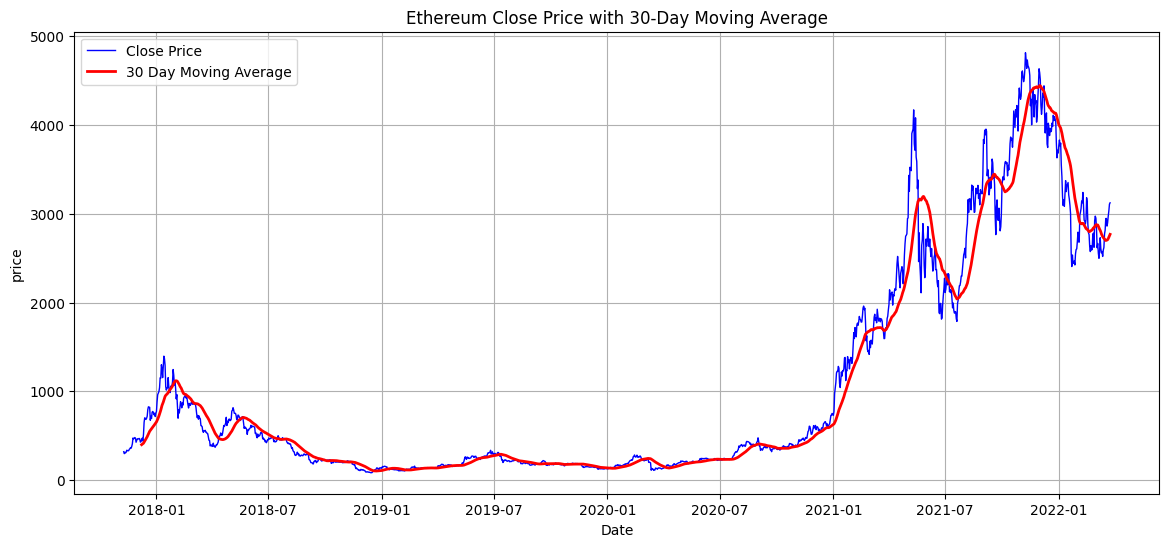

In [8]:
df['MA30'] = df['Close'].rolling(window = 30).mean()
plt.figure(figsize = (14, 6))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(df['MA30'], label = "30 Day Moving Average", color = 'red', linewidth = 2)

plt.title('Ethereum Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.grid()
plt.show()


step 9:

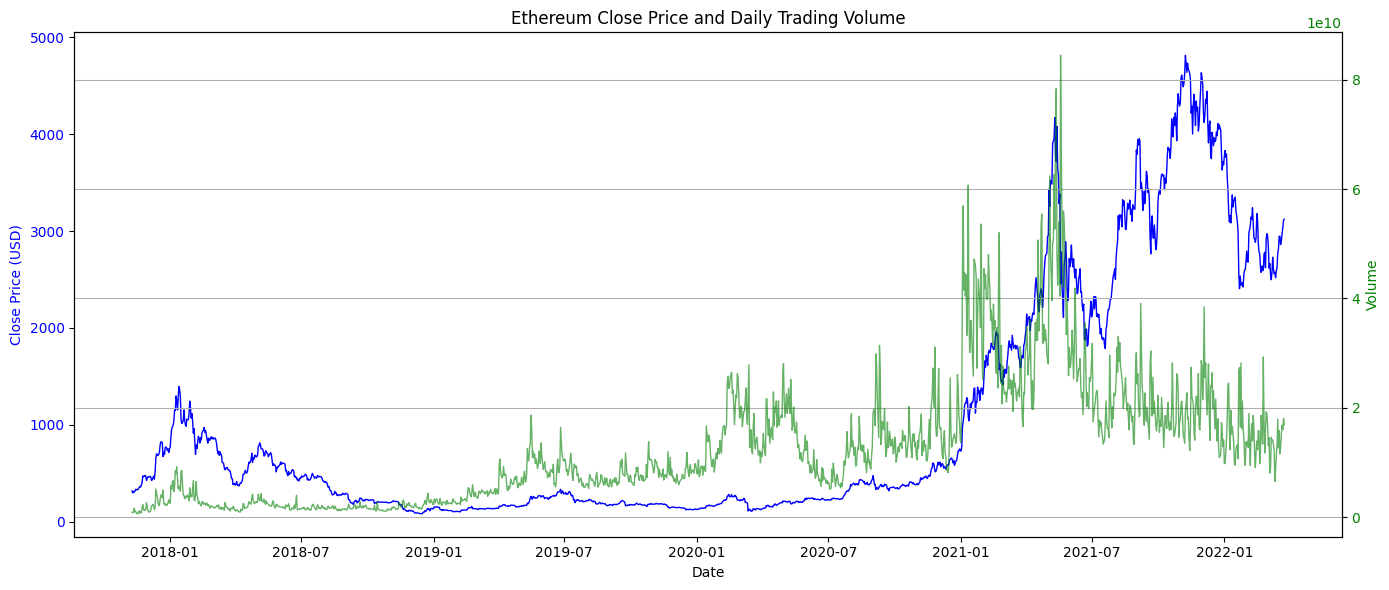

In [9]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Close Price on the first y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price (USD)', color='blue')
ax1.plot(df['Close'], color='blue', label='Close Price', linewidth=1)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='green')
ax2.plot(df['Volume'], color='green', label='Volume', linewidth=1, alpha=0.6)
ax2.tick_params(axis='y', labelcolor='green')

# Title and layout
plt.title('Ethereum Close Price and Daily Trading Volume')
fig.tight_layout()
plt.grid(True)
plt.show()


Step 10:

In [10]:
from statsmodels.tsa.stattools import adfuller


In [11]:
result_raw = adfuller(df['Close'].dropna())

print("ADF Statistic (Raw):", result_raw[0])
print("p-value (Raw):", result_raw[1])
print("Critical Values:")
for key, value in result_raw[4].items():
    print(f"\t{key}: {value}")



ADF Statistic (Raw): -0.5659701444521514
p-value (Raw): 0.8784874888649452
Critical Values:
	1%: -3.434495541689653
	5%: -2.8633710099910963
	10%: -2.567744796106393


In [12]:
df['Close_diff'] = df['Close'].diff().dropna()


In [13]:
result_diff = adfuller(df['Close_diff'].dropna())

print("\nADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f"\t{key}: {value}")


ADF Statistic (Differenced): -10.24822770817513
p-value (Differenced): 4.557682002400704e-18
Critical Values:
	1%: -3.434495541689653
	5%: -2.8633710099910963
	10%: -2.567744796106393


In [14]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [15]:
# ADF Test on raw Close price
result_raw = adfuller(df['Close'].dropna())
print("Raw Close Price ADF p-value:", result_raw[1])

# Create differenced Close price column
df['Close_diff'] = df['Close'].diff()

# ADF Test on differenced Close price
result_diff = adfuller(df['Close_diff'].dropna())
print("Differenced Close Price ADF p-value:", result_diff[1])


Raw Close Price ADF p-value: 0.8784874888649452
Differenced Close Price ADF p-value: 4.557682002400704e-18


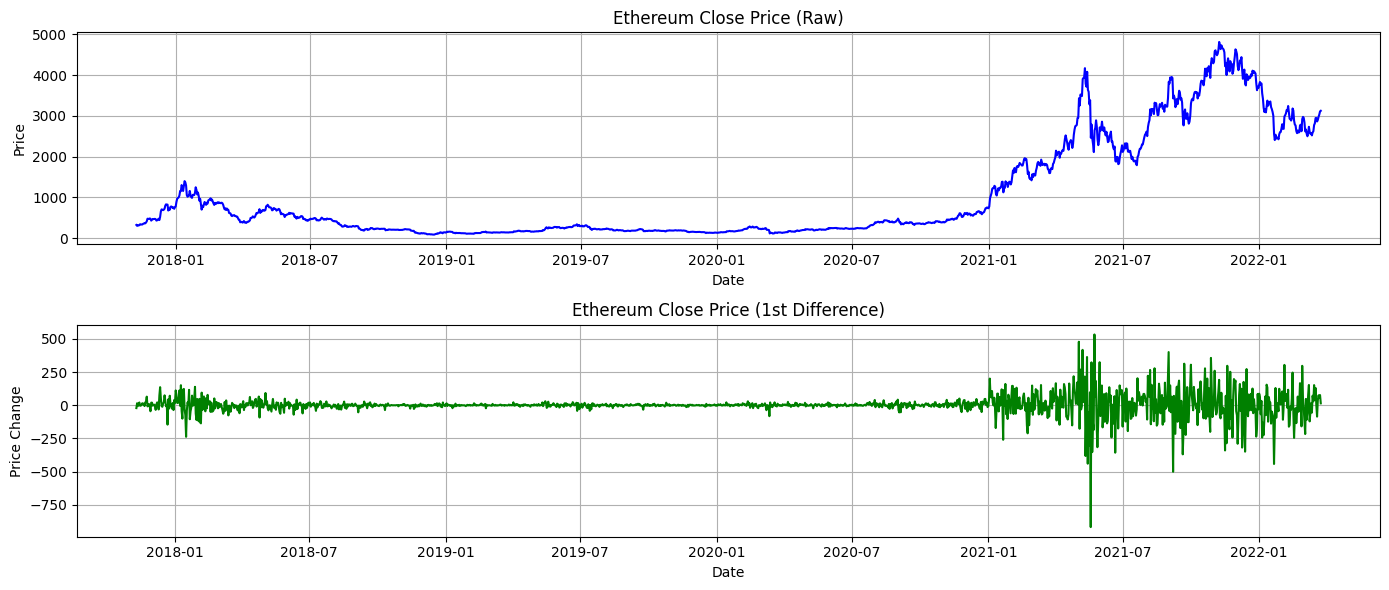

In [16]:
plt.figure(figsize=(14, 6))

# Plot raw Close price
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Raw Close Price', color='blue')
plt.title('Ethereum Close Price (Raw)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

# Plot differenced Close price
plt.subplot(2, 1, 2)
plt.plot(df['Close_diff'], label='Differenced Close Price', color='green')
plt.title('Ethereum Close Price (1st Difference)')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.grid(True)

plt.tight_layout()
plt.show()


Generate acf and pacf plots for differencing close price

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


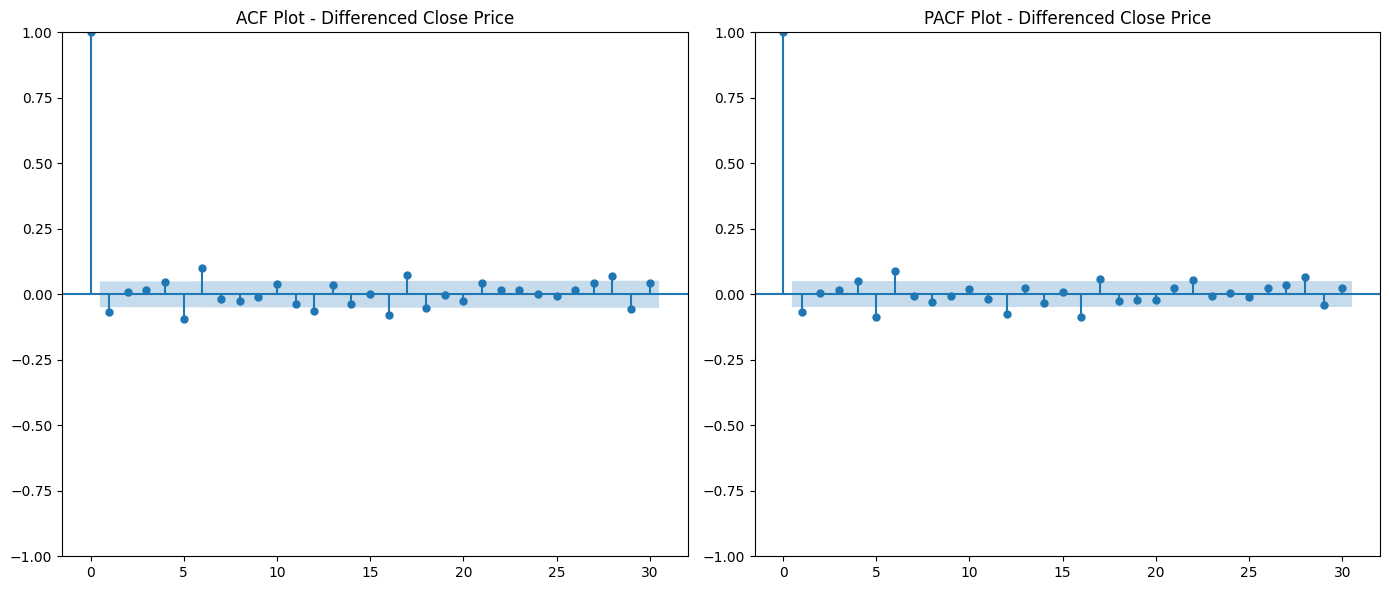

In [18]:
# Drop NaNs from differenced column
diff_close = df['Close_diff'].dropna()

# Set up the figure
plt.figure(figsize=(14, 6))

# ACF plot (for q)
plt.subplot(1, 2, 1)
plot_acf(diff_close, lags=30, ax=plt.gca())
plt.title('ACF Plot - Differenced Close Price')

# PACF plot (for p)
plt.subplot(1, 2, 2)
plot_pacf(diff_close, lags=30, ax=plt.gca(), method='ywm')
plt.title('PACF Plot - Differenced Close Price')

plt.tight_layout()
plt.show()


In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np


In [20]:
# Drop NaNs
df.dropna(inplace=True)

# Define train and test
train = df['Close'][:-30]
test = df['Close'][-30:]


In [21]:
# Define and fit model
model = ARIMA(train, order=(2, 1, 1))  # replace with your actual p,d,q
model_fit = model.fit()

# Summary (optional)
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1539
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -8903.043
Date:                Wed, 21 May 2025   AIC                          17814.086
Time:                        16:00:31   BIC                          17835.439
Sample:                    12-08-2017   HQIC                         17822.031
                         - 02-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6032      0.253      2.383      0.017       0.107       1.099
ar.L2          0.0647      0.017      3.737      0.000       0.031       0.099
ma.L1         -0.6708      0.255     -2.626      0.0

In [22]:
# Forecast
forecast = model_fit.forecast(steps=30)


In [23]:
# RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

# MAPE
mape = mean_absolute_percentage_error(test, forecast)
print("Mean Absolute Percentage Error (MAPE):", mape)

# R² Score
r2 = r2_score(test, forecast)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 257.6789962152545
Mean Absolute Percentage Error (MAPE): 0.0674885099672952
R² Score: -0.9767253941609191


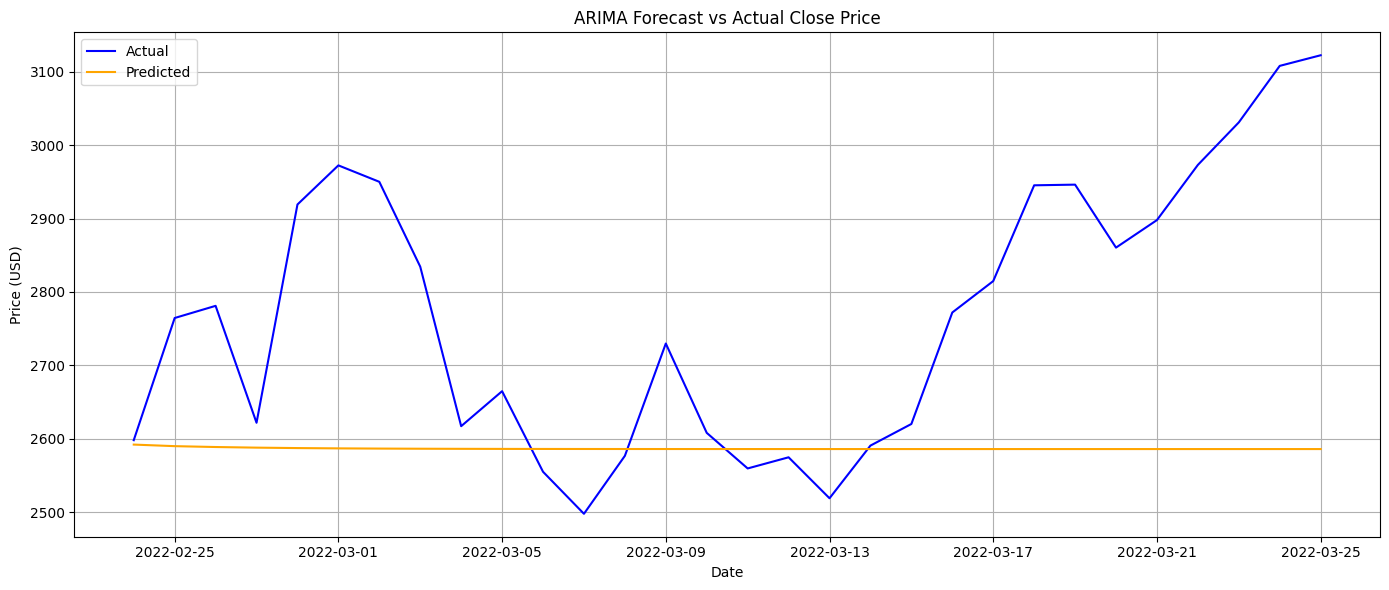

In [24]:
plt.figure(figsize=(14,6))
plt.plot(test.index, test.values, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Predicted', color='orange')
plt.title('ARIMA Forecast vs Actual Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


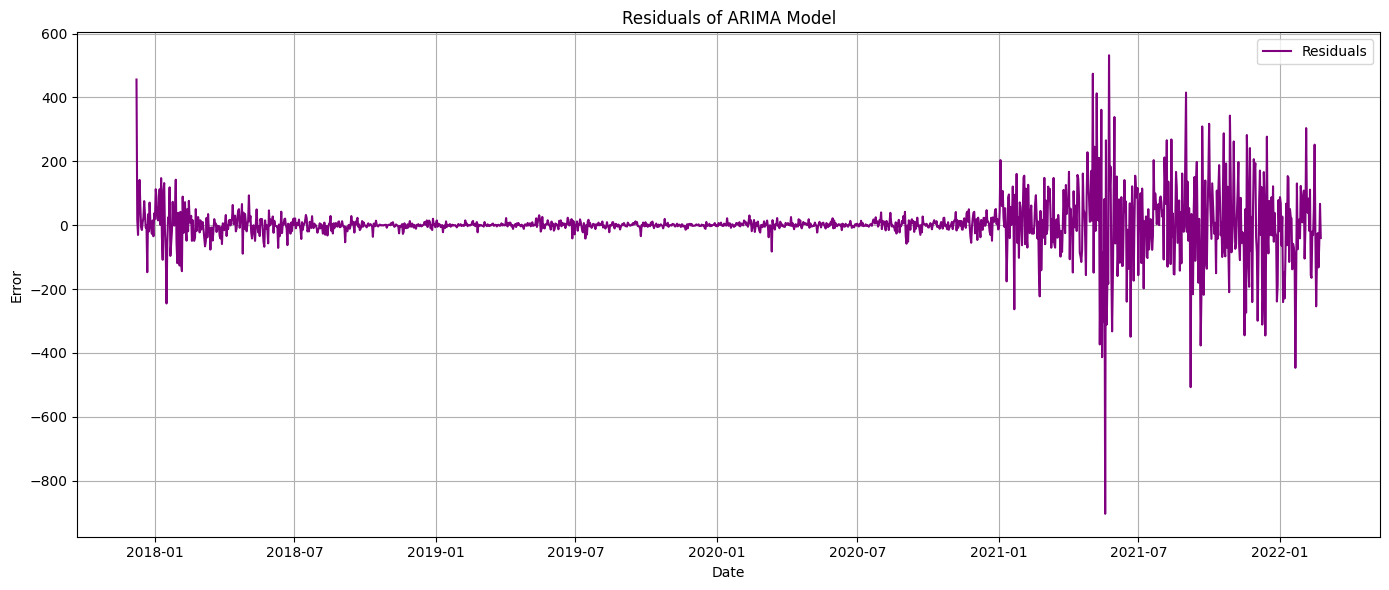

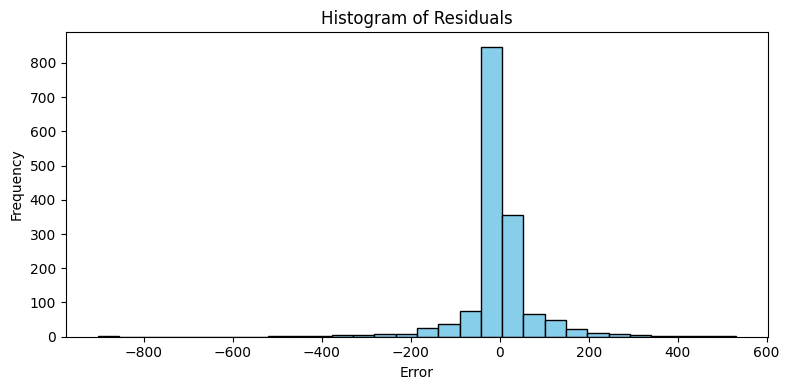

In [25]:
# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(14, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Error')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [26]:
# Refit ARIMA on full data
model_full = ARIMA(df['Close'], order=(2, 1, 1))  # replace with your p,d,q
model_full_fit = model_full.fit()

# Forecast next 30 days
forecast_30 = model_full_fit.get_forecast(steps=30)
forecast_mean = forecast_30.predicted_mean
forecast_ci = forecast_30.conf_int()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

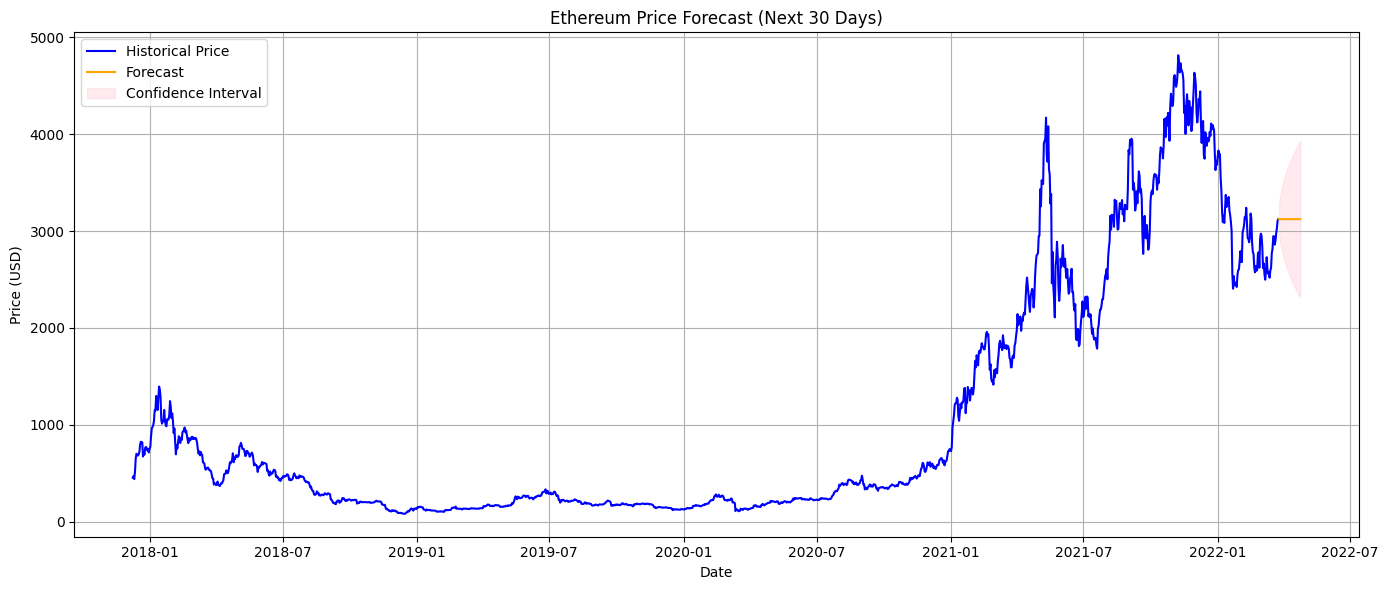

In [27]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical Price', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_mean.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Ethereum Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
